# Import Packages

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [63]:
data = pd.read_csv("/content/T1.csv")

In [64]:
print('How many observations do we have?')
print(data.count())
print('----------------')
print(data.columns)


How many observations do we have?
Date/Time                        50530
LV ActivePower (kW)              50530
Wind Speed (m/s)                 50530
Theoretical_Power_Curve (KWh)    50530
Wind Direction (°)               50530
dtype: int64
----------------
Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')


In [65]:
data['Date/Time']=pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data['Week']=data['Date/Time'].dt.day // 7 + 1

data['Week'].value_counts()

,count
Week,
3,11948
4,11809
2,11645
1,9924
5,5204


### Extracting Seasons, month, hour and Day

In [66]:
data['Month']=data['Date/Time'].dt.month
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
data['Seasons'] = data['Month'].map(seasons_dict)
data['Day']=data['Date/Time'].dt.day
data['Hour']=data['Date/Time'].dt.hour
##data.drop(columns=['Date/Time'],inplace=True)


# Failure Condition

In [67]:
def failure_condition(row):
    # Check the conditions
    if (row['LV ActivePower (kW)'] == 0 and
        row['Theoretical_Power_Curve (KWh)'] != 0 and
        row['Wind Speed (m/s)'] > 3.0 and
        ((0 <= row['Wind Direction (°)'] <= 90) or (135 <= row['Wind Direction (°)'] <= 270))):
        return 1
    else:
        return 0
data['Failure Condition'] = data.apply(failure_condition, axis=1)

# Display the first few rows of the updated data
print(data.head())

# Print the number of observations that meet the failure condition
failure_count = data['Failure Condition'].sum()
print('No of Observations (while Wind Speed > 3 m/s and Power Production = 0 and Wind Direction = [0, 90] or [135, 270]): ', failure_count)

            Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2018-01-01 00:00:00           380.047791          5.311336   
1 2018-01-01 00:10:00           453.769196          5.672167   
2 2018-01-01 00:20:00           306.376587          5.216037   
3 2018-01-01 00:30:00           419.645905          5.659674   
4 2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  Week  Month Seasons  \
0                     416.328908          259.994904     1      1  Winter   
1                     519.917511          268.641113     1      1  Winter   
2                     390.900016          272.564789     1      1  Winter   
3                     516.127569          271.258087     1      1  Winter   
4                     491.702972          265.674286     1      1  Winter   

   Day  Hour  Failure Condition  
0    1     0                  0  
1    1     0                  0  
2    1     0                  0  
3    1     0    

In [68]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Seasons,Day,Hour,Failure Condition
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,Winter,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,Winter,1,0,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,Winter,1,0,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,Winter,1,0,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,Winter,1,0,0


# Handling Imbalanced dataset

In [69]:
import collections
from imblearn.over_sampling import SMOTE
# Check the distribution of your classes
print(collections.Counter(y))


Counter({np.int64(0): 47686, np.int64(1): 2844})


## SMOTE for balancing the dataset

In [70]:
# Identify classes with very few samples (e.g., 1 sample)
unique_classes = collections.Counter(y)
minority_classes = [cls for cls, count in unique_classes.items() if count == 1]
print("Classes with only 1 sample:", minority_classes)

# Remove rows with classes that have only 1 sample
data = data[~data['Failure Condition'].isin(minority_classes)]

# Re-split features and target after removing problematic class
X = data[['Month','Hour', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = data['Failure Condition']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


print("Class distribution after SMOTE:", collections.Counter(y_smote))

Classes with only 1 sample: []
Class distribution after SMOTE: Counter({0: 47686, 1: 47686})


# Deep learning algorithms

# ALL  DEEP LEARNING MODELS with prediction


 Training MLP Model...

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2385/2385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7124 - loss: 0.5617 - val_accuracy: 0.7976 - val_loss: 0.4405
Epoch 2/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7970 - loss: 0.4409 - val_accuracy: 0.8305 - val_loss: 0.3917
Epoch 3/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8198 - loss: 0.4052 - val_accuracy: 0.8401 - val_loss: 0.3692
Epoch 4/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8318 - loss: 0.3837 - val_accuracy: 0.8469 - val_loss: 0.3566
Epoch 5/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8363 - loss: 0.3750 - val_accuracy: 0.8527 - val_loss: 0.3482
Epoch 6/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8392 - loss: 0.3668 - val_accuracy: 0.8495 - val_loss: 0.3458
Epoch 7/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8450 - loss: 0.3613 - val_accuracy: 0.8571 - val_loss: 0.3385
Epoch 8/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8469 - loss: 0.3541 - val_accura

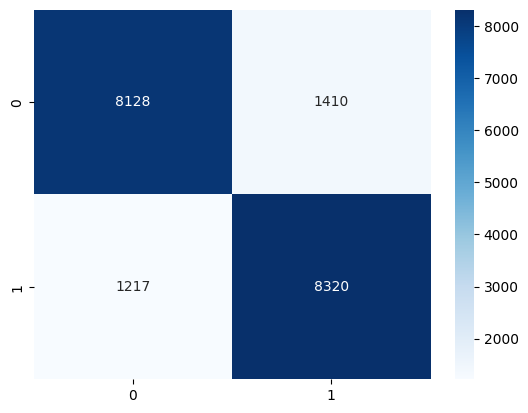


 Training CNN Model...

Epoch 1/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7279 - loss: 0.5383 - val_accuracy: 0.7918 - val_loss: 0.4426
Epoch 2/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8151 - loss: 0.4172 - val_accuracy: 0.8290 - val_loss: 0.3865
Epoch 3/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8415 - loss: 0.3709 - val_accuracy: 0.8460 - val_loss: 0.3635
Epoch 4/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8521 - loss: 0.3506 - val_accuracy: 0.8566 - val_loss: 0.3416
Epoch 5/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8580 - loss: 0.3350 - val_accuracy: 0.8581 - val_loss: 0.3339
Epoch 6/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8614 - loss: 0.3275 - val_accuracy: 0.8599 - val_loss: 0.3292
Epoch 7/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8631 - loss: 0.3196 - val_accuracy: 0.8630 - val_loss: 0.3202
Epoch 8/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy

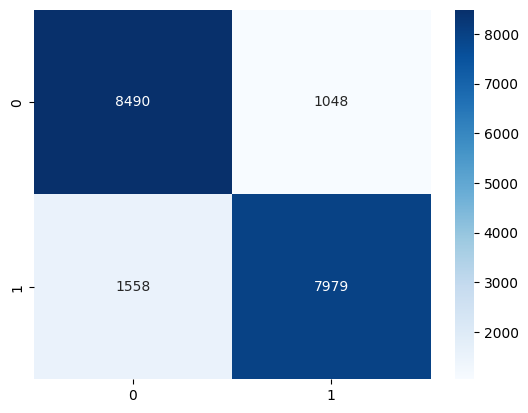


 Training LSTM Model...

Epoch 1/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7070 - loss: 0.5798 - val_accuracy: 0.7664 - val_loss: 0.4849
Epoch 2/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7786 - loss: 0.4655 - val_accuracy: 0.8216 - val_loss: 0.4083
Epoch 3/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8317 - loss: 0.3854 - val_accuracy: 0.8490 - val_loss: 0.3612
Epoch 4/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8458 - loss: 0.3539 - val_accuracy: 0.8535 - val_loss: 0.3467
Epoch 5/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8548 - loss: 0.3373 - val_accuracy: 0.8552 - val_loss: 0.3385
Epoch 6/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8580 - loss: 0.3302 - val_accuracy: 0.8589 - val_loss: 0.3258
Epoch 7/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8634 - loss: 0.3165 - val_accuracy: 0.8669 - val_loss: 0.3166
Epoch 8/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - 

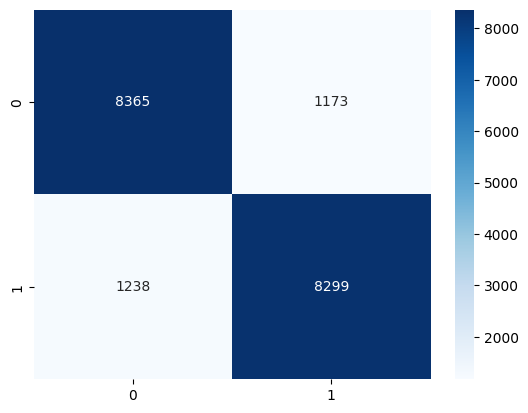


 Training RNN Model...

Epoch 1/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7433 - loss: 0.5095 - val_accuracy: 0.8350 - val_loss: 0.3825
Epoch 2/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8399 - loss: 0.3686 - val_accuracy: 0.8492 - val_loss: 0.3448
Epoch 3/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8571 - loss: 0.3375 - val_accuracy: 0.8615 - val_loss: 0.3255
Epoch 4/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8653 - loss: 0.3209 - val_accuracy: 0.8678 - val_loss: 0.3079
Epoch 5/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8699 - loss: 0.3091 - val_accuracy: 0.8695 - val_loss: 0.3120
Epoch 6/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8741 - loss: 0.2985 - val_accuracy: 0.8756 - val_loss: 0.2927
Epoch 7/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8758 - loss: 0.2964 - val_accuracy: 0.8748 - val_loss: 0.2990
Epoch 8/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accur

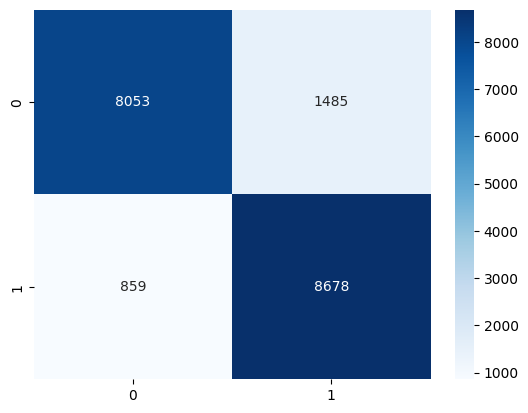


 Training Hybrid CNN-LSTM Model...

Epoch 1/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7198 - loss: 0.5495 - val_accuracy: 0.8228 - val_loss: 0.3934
Epoch 2/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8352 - loss: 0.3750 - val_accuracy: 0.8523 - val_loss: 0.3478
Epoch 3/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8558 - loss: 0.3342 - val_accuracy: 0.8635 - val_loss: 0.3203
Epoch 4/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8624 - loss: 0.3162 - val_accuracy: 0.8704 - val_loss: 0.3060
Epoch 5/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8714 - loss: 0.2995 - val_accuracy: 0.8761 - val_loss: 0.2965
Epoch 6/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8769 - loss: 0.2912 - val_accuracy: 0.8809 - val_loss: 0.2852
Epoch 7/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8804 - loss: 0.2828 - val_accuracy: 0.8809 - val_loss: 0.2816
Epoch 8/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 12s 

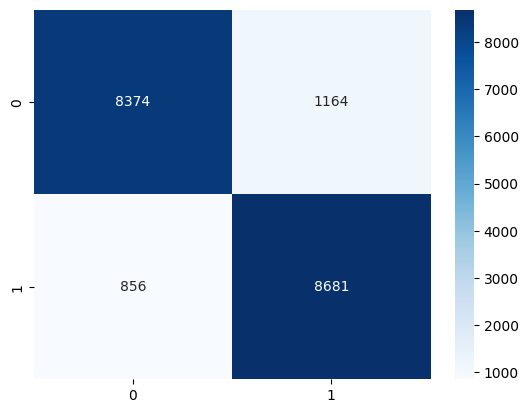


 Best Model: Hybrid CNN-LSTM with Accuracy: 0.8941


In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, SimpleRNN, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load Data ---- #
#data = pd.read_csv("T1.csv")  # Change to your dataset

# Select features and target
X = data[['Month', 'Hour', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = data['Failure Condition']  # Ensure this is categorical

# Encode labels if classification
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converts categorical labels to numbers

# Train-test split
X_train, X_test, y_train, y_test  = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for deep learning models
X_train_cnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_cnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train_lstm = X_train.reshape(X_train.shape[0], 5, 1)
X_test_lstm = X_test.reshape(X_test.shape[0], 5, 1)

# ---- Model Definitions ---- #
models = {}

# --- MLP Model --- #
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["MLP"] = mlp

# --- CNN Model --- #
cnn = Sequential([
    Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(1, 5)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["CNN"] = cnn

# --- LSTM Model --- #
lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(5, 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["LSTM"] = lstm

# --- RNN Model --- #
rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(5, 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["RNN"] = rnn

# --- Hybrid CNN-LSTM Model --- #
hybrid = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(5, 1)),  # CNN Feature Extractor
    LSTM(50, activation='relu', return_sequences=False),  # LSTM for sequence learning
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["Hybrid CNN-LSTM"] = hybrid

# ---- Train and Evaluate Models ---- #
history = {}
accuracy_scores = {}

for model_name, model in models.items():
    print(f"\n Training {model_name} Model...\n")
    X_train_data = X_train if model_name == "MLP" else X_train_cnn if model_name == "CNN" else X_train_lstm
    X_test_data = X_test if model_name == "MLP" else X_test_cnn if model_name == "CNN" else X_test_lstm

    model.fit(X_train_data, y_train, epochs=10, batch_size=32, validation_data=(X_test_data, y_test), verbose=1)

    # Evaluate
    y_pred = (model.predict(X_test_data) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = acc

    print(f"\n {model_name} Accuracy: {acc:.4f}")
    print(f"\n Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"\n  Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.show()

# ---- Select Best Model ---- #
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.4f}")


 Hybrid CNN-LSTM Accuracy: 0.8941

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      9538
           1       0.88      0.91      0.90      9537

    accuracy                           0.89     19075
   macro avg       0.89      0.89      0.89     19075
weighted avg       0.89      0.89      0.89     19075



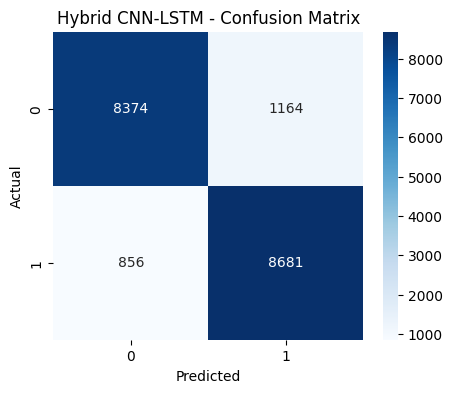

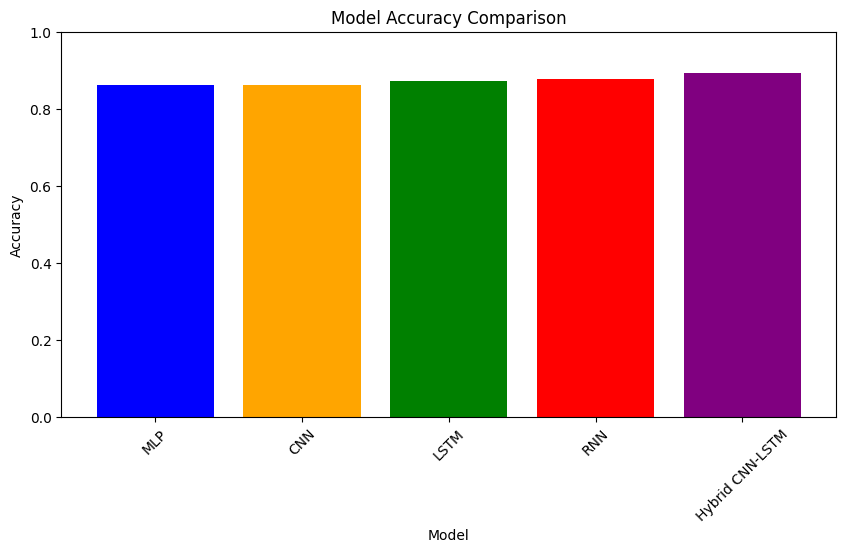

In [72]:
 # Display results
print(f"\n {model_name} Accuracy: {acc:.4f}")
print(f"\n Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"{model_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- Plot Accuracy Scores ---- #
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()


In [73]:
# ---- Load New Test Data & Predict ---- #
new_test_data = pd.read_csv("/content/new_test_data.csv")
# Select only the features used during training
features = ['Month', 'Hour', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
new_test_data_for_prediction = new_test_data[features]

# Scale the new test data using only the relevant features
new_test_data_scaled = scaler.transform(new_test_data_for_prediction)

# Reshape for the best model (if necessary)
if best_model_name in ["CNN"]:
    new_test_data_scaled = new_test_data_scaled.reshape(new_test_data_scaled.shape[0], 1, new_test_data_scaled.shape[1])
elif best_model_name in ["LSTM", "RNN", "Hybrid CNN-LSTM"]: # Include 'Hybrid CNN-LSTM' here
    new_test_data_scaled = new_test_data_scaled.reshape(new_test_data_scaled.shape[0], 5, 1) # Reshape to (samples, timesteps, features)

# Make predictions using the best model
new_predictions = (best_model.predict(new_test_data_scaled) > 0.5).astype(int)

# Decode labels if classification
new_predictions = encoder.inverse_transform(new_predictions.flatten())

# Convert new predictions to a DataFrame
new_test_data["Predicted Failure Condition"] = new_predictions  # Add predictions as a new column

# Save combined data
new_test_data.to_csv("combined_predictions.csv", index=False)

print("\n✅ Combined Predictions saved to 'combined_predictions.csv'")
print(new_test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

✅ Combined Predictions saved to 'combined_predictions.csv'
       Month      Hour  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
0  -1.615578 -1.660864         -0.531476                      -0.786435   
1  -1.615578 -1.660864         -0.446115                      -0.710712   
2  -1.615578 -1.660864         -0.554021                      -0.805023   
3  -1.615578 -1.660864         -0.449071                      -0.713483   
4  -1.615578 -1.660864         -0.468406                      -0.731337   
5  -1.615578 -1.660864         -0.462229                      -0.725684   
6  -1.615578 -1.516659         -0.417528                      -0.683333   
7  -1.615578 -1.516659         -0.532727                      -0.787481   
8  -1.615578  0.502216         -0.902421                      -1.029375   
9  -1.615578  0.646421         -1.070219                      -1.078209   
10 -1.615578  0.646421         -1.031576                      -1.072178   
11